In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # matplotlib 3.2.0 後可省略
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [4]:
# Input variables:(銀行客戶資料）
# 1 - age 年齡
# 2 - job : 工作類型
# 3 - marital : 婚姻狀況
# 4 - education 教育類別
# 5 - default: 有違約信用嗎？
# 6 - housing: 有房貸款嗎？
# 7 - loan: 有個人貸款嗎？
# 8 - contact: 聯繫通信類型
# 9 - month: 最後一個接觸月
# 10 - day_of_week: 最後一個聯繫日周幾
# 11 - duration: 上次接觸時間，以秒為單位
# 12 - campaign: 在此活動期間為此客戶執行的聯繫數量(numeric, includes last contact)
# 13 - pdays: 上次活動後與客戶最後一次聯繫之後經過的天數 (numeric; 999 means client was not previously contacted)
# 14 - previous: 此活動之前和這個客戶進行接觸次數
# 15 - poutcome: 先前行銷活動的結果 (categorical: 'failure','nonexistent','success')
# 16 - emp.var.rate: 就業變化率
# 17 - cons.price.idx: 消費者價格指數
# 18 - cons.conf.idx: 消費者信心指數
# 19 - euribor3m: 歐元3個月利率
# 20 - nr.employed: 員工數
 
# class -客戶是否已簽署定期存款？ (輸出變量（目標）兩類別: 'yes' 及 'no')
  


In [5]:
data_le=pd.read_excel('bank.xlsx')
data_le_df_un=data_le.drop(['class'],axis=1)


# label encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data_le['job'] = labelencoder.fit_transform(data_le['job'])
data_le['marital'] = labelencoder.fit_transform(data_le['marital'])
data_le['education'] = labelencoder.fit_transform(data_le['education'])
data_le['default'] = labelencoder.fit_transform(data_le['default'])
data_le['housing'] = labelencoder.fit_transform(data_le['housing'])
data_le['loan'] = labelencoder.fit_transform(data_le['loan'])
data_le['contact'] = labelencoder.fit_transform(data_le['contact'])
data_le['month'] = labelencoder.fit_transform(data_le['month'])
data_le['day_of_week'] = labelencoder.fit_transform(data_le['day_of_week'])
data_le['poutcome'] = labelencoder.fit_transform(data_le['poutcome'])
data_le['class'] = labelencoder.fit_transform(data_le['class'])
#class 
#class_ = labelencoder.fit_transform(data_le['class'])
#data_le=data_le.drop(['class'],axis=1)
title=data_le.columns
#title=title.drop(['class'])


In [7]:
data_le_df=data_le

# XGBOOST挑選特徵欄位

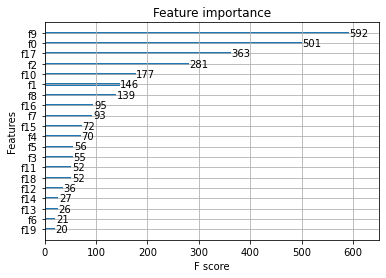

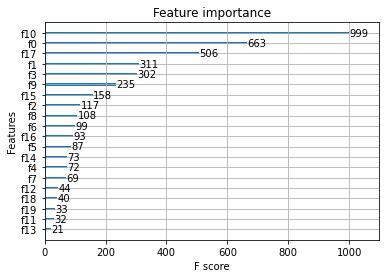

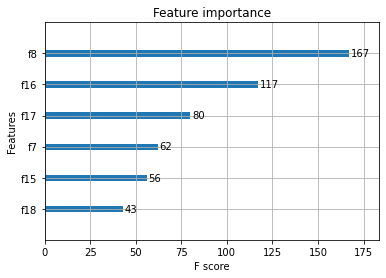

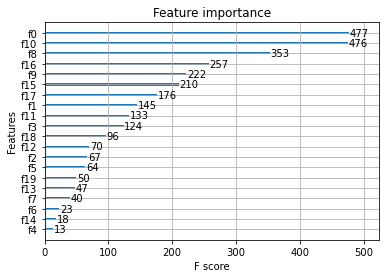

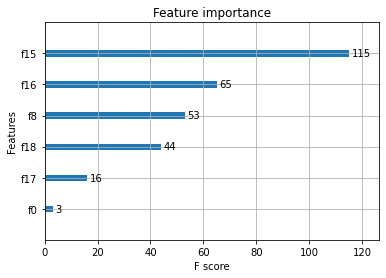

In [8]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

#value columns
#age	duration	campaign	pdays	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed previous
imp_f=['age','campaign','cons.price.idx','euribor3m','nr.employed']
#age
#campaign: 在此活動期間為此客戶執行的聯繫數量(numeric, includes last contact)
#cons.price.idx: 消費者價格指數
#euribor3m: 歐元3個月利率
#nr.employed: 員工數
for i in range(len(imp_f)):
    X=data_le.drop([imp_f[i]],axis=1)
    y=data_le[imp_f[i]]
    X=np.array(X)
    y=np.array(y)

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    model = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=160,objective='reg:gamma')
    model.fit(X_train,y_train)
    # 進行預測
    ans = model.predict(X_test)
    # 顯示重要特徵
    plot_importance(model)
    plt.show()

In [9]:
#model score 
model.score(X,y)

0.9966195569552169

# 進行分群

In [10]:
data_le=np.array(data_le)
dx=data_le
dy=title

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
clusters = 20

distortions = []
scores = []
# K 值的範圍 (2~10)
k_range = range(2, clusters + 1)

In [12]:
# 記錄每種 K 值建出的 KMeans 模型的成效
for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(dx)
    distortions.append(kmeans.inertia_) # 誤差平方和 (SSE)
    scores.append(silhouette_score(dx, kmeans.predict(dx))) # 側影係數

In [13]:
# 找出最大的側影係數來決定 K 值
selected_K = scores.index(max(scores)) + 2

# Define clust sum

In [14]:
from sklearn import cluster as sk_cluster
from scipy.spatial import distance as sci_distance

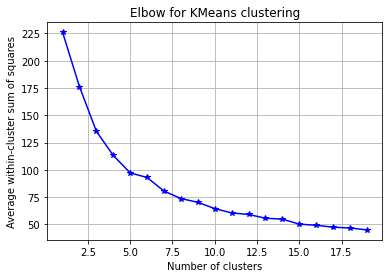

In [15]:
cdata = data_le
K = range(1, 20)
KM = (sk_cluster.KMeans(n_clusters=k).fit(cdata) for k in K)
centroids = (k.cluster_centers_ for k in KM)

D_k = (sci_distance.cdist(cdata, cent, 'euclidean') for cent in centroids)
dist = (np.min(D, axis=1) for D in D_k)
avgWithinSS = [sum(d) / cdata.shape[0] for d in dist]
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

# kmean聚類 (value avg)

In [16]:
#計算類別欄位眾數

In [17]:
#計算類別欄位眾數
def calarg(col):
    #獲取平鋪後每個索引位置值在原始數列中出現的次數
    counts = np.bincount(col)
    #返回眾數返回可持續在數列中的索引位置
    c=np.argmax(counts)
    return(c,counts)

In [18]:
#最佳群數
n_clusters = selected_K
customer_data=data_le_df
means_cluster = sk_cluster.KMeans(n_clusters=n_clusters, random_state=111)
columns = title
est = means_cluster.fit(customer_data[columns])
clusters = est.labels_
customer_data['cluster'] = clusters

# Print some data about the clusters:

# For each cluster, count the members.
for c in range(n_clusters):
    cluster_members=customer_data[customer_data['cluster'] == c][:]
    print('Cluster{}(n={}):'.format(c, len(cluster_members)))
    print('-'* 17)
print(customer_data.groupby(['cluster']).mean())

Cluster0(n=158):
-----------------
Cluster1(n=3476):
-----------------
Cluster2(n=485):
-----------------
               age       job   marital  education   default   housing  \
cluster                                                                 
0        42.253165  4.018987  1.310127   4.436709  0.018987  1.189873   
1        39.903913  3.832566  1.171174   3.765247  0.203107  1.083429   
2        40.919588  3.707216  1.175258   3.674227  0.197938  1.032990   

             loan   contact     month  day_of_week  ...  campaign       pdays  \
cluster                                             ...                         
0        0.329114  0.063291  4.898734     1.917722  ...  1.784810    5.835443   
1        0.354430  0.372842  4.267837     2.006329  ...  2.581703  999.000000   
2        0.311340  0.331959  4.292784     2.063918  ...  2.463918  994.913402   

         previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
cluster                                       

# 各群結果

In [30]:
columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
clust_01=customer_data['cluster']==0
clust_02=customer_data['cluster']==1
clust_03=customer_data['cluster']==2
c01=customer_data[clust_01]
c02=customer_data[clust_02]
c03=customer_data[clust_03]
value_col=['age','duration','cons.price.idx','euribor3m','nr.employed']
class_col=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','class']
#job	marital	education	default	housing	loan	contact	month	day_of_week poutcome

#cons.conf.idx  emp.var.rate

158 3483 478


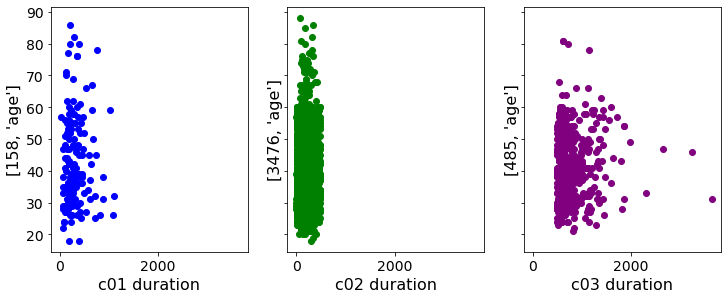

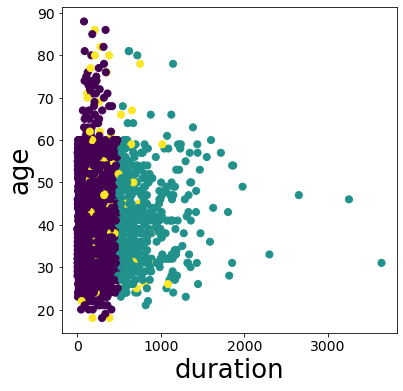

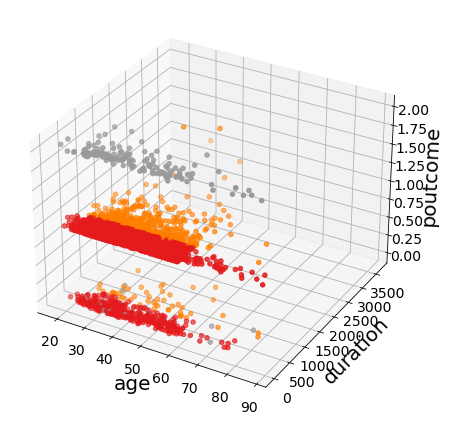

In [163]:
KM=KMeans(n_clusters=n_clusters,init='random',random_state=111)
cdata_km=KM.fit(cdata)
#~~/\
asd=KM.predict(cdata)
#result process
cluster01=asd==0
cluster02=asd==1
cluster03=asd==2
c02_=np.array(customer_data[cluster01])
c03_=np.array(customer_data[cluster02])
c01_=np.array(customer_data[cluster03])
import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (12, 4.5))
plt.figure(figsize=(6, 6))

ax1.set_xlabel('c01 duration', fontsize = 16)
ax1.set_ylabel([len(c01),'age'], fontsize = 16)

ax2.set_xlabel('c02 duration', fontsize = 16)
ax2.set_ylabel([len(c02),'age'], fontsize = 16)

ax3.set_xlabel('c03 duration', fontsize = 16)
ax3.set_ylabel([len(c03),'age'], fontsize = 16)


ax1.scatter(c01_[:, 10], c01_[:, 0], marker='o',c='blue')
ax2.scatter(c02_[:, 10], c02_[:, 0], marker='o',c='green')
ax3.scatter(c03_[:, 10], c03_[:, 0], marker='o',c='purple')

#重疊
plt.xlabel('duration',fontsize=26)
plt.ylabel('age',fontsize=26)

plt.scatter(cdata[:,10],cdata[:,0],c=asd,s=50)

print(len(c01_),len(c02_),len(c03_))
#new_dy = est.predict(cdata)
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(122, projection='3d')

ax.set_xlabel('age', fontsize = 20)
ax.set_ylabel('duration', fontsize = 20)
ax.set_zlabel('poutcome', fontsize = 20)

ax.scatter(cdata.T[0], cdata.T[10], cdata.T[14], c=asd, cmap=plt.cm.Set1)
plt.show()

# 計算類別欄位眾數

In [32]:
c01_arg=[]
c02_arg=[]
c03_arg=[]
# for i in range(len(columns)):
for i in value_col:
    c01_arg.append(calarg(c01[i]))
    c02_arg.append(calarg(c02[i]))
    c03_arg.append(calarg(c03[i]))
c_all=[c01_arg,c02_arg,c03_arg]

c01_arg_class=[]
c02_arg_class=[]
c03_arg_class=[]

for i in class_col:
    c01_arg_class.append(calarg(c01[i]))
    c02_arg_class.append(calarg(c02[i]))
    c03_arg_class.append(calarg(c03[i]))
c_all_class=[c01_arg_class,c02_arg_class,c03_arg_class]
print(len(c01),len(c02),len(c03))

158 3476 485


In [33]:
df_val=pd.DataFrame(c_all,index=['c01','c02','c03'],columns=value_col)
df_class=pd.DataFrame(c_all_class,index=['c01','c02','c03'],columns=class_col)

In [34]:
df_val

,age,duration,cons.price.idx,euribor3m,nr.employed
c01,"(30, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","(222, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(92, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","(0, [117, 35, 0, 0, 6])","(4991, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
c02,"(32, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","(77, [1, 0, 0, 0, 1, 4, 5, 4, 6, 9, 10, 8, 6, ...","(93, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","(4, [259, 785, 0, 2, 2430])","(5228, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
c03,"(31, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","(487, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(93, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","(4, [29, 117, 0, 0, 338, 1])","(5228, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [35]:
df_class

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,class
c01,"(0, [54, 14, 1, 2, 15, 17, 5, 8, 8, 24, 8, 2])","(1, [11, 87, 60])","(6, [11, 3, 11, 37, 0, 21, 65, 10])","(0, [155, 3])","(2, [62, 4, 92])","(0, [130, 4, 24])","(0, [148, 10])","(1, [7, 28, 5, 12, 16, 11, 24, 24, 10, 21])","(3, [29, 36, 34, 37, 22])","(2, [18, 0, 140])","(1, [60, 98])"
c02,"(0, [838, 761, 132, 98, 272, 118, 132, 344, 62...","(1, [382, 2125, 961, 8])","(6, [363, 206, 490, 763, 1, 447, 1068, 138])","(0, [2771, 704, 1])","(2, [1548, 90, 1838])","(0, [2815, 90, 571])","(0, [2180, 1296])","(6, [177, 559, 14, 587, 453, 33, 1193, 367, 54...","(2, [648, 726, 729, 702, 671])","(1, [385, 3091])","(0, [3313, 163])"
c03,"(0, [120, 109, 15, 10, 37, 31, 22, 41, 12, 73,...","(1, [53, 297, 132, 3])","(6, [55, 19, 73, 121, 0, 67, 131, 19])","(0, [389, 96])","(2, [229, 11, 245])","(0, [404, 11, 70])","(0, [324, 161])","(6, [31, 49, 3, 112, 61, 4, 161, 55, 5, 4])","(3, [91, 93, 97, 102, 102])","(1, [51, 432, 2])","(0, [295, 190])"


# 分析結果

,cluster01,cluster02,cluster03
0 failure,18,385,51
1 nonexistent,0,3091,432
2 sucess,140,0,2


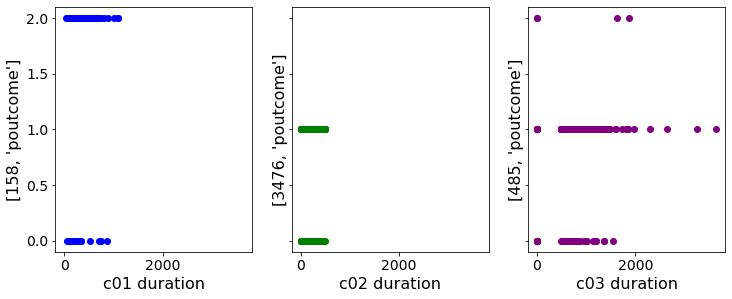

<Figure size 432x432 with 0 Axes>

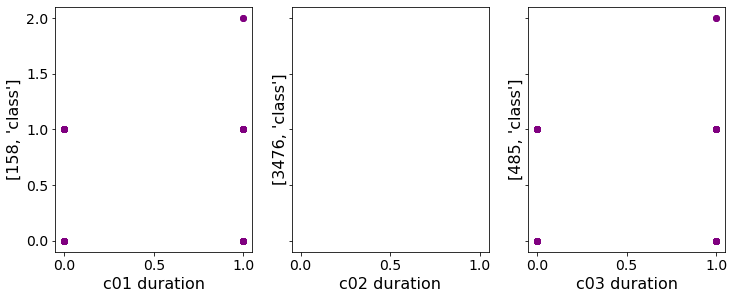

<Figure size 432x432 with 0 Axes>

In [75]:
# 推銷結果 與 接觸秒數
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (12, 4.5))
plt.figure(figsize=(6, 6))

ax1.set_xlabel('c01 duration', fontsize = 16)
ax1.set_ylabel([len(c01),'poutcome'], fontsize = 16)

ax2.set_xlabel('c02 duration', fontsize = 16)
ax2.set_ylabel([len(c02),'poutcome'], fontsize = 16)

ax3.set_xlabel('c03 duration', fontsize = 16)
ax3.set_ylabel([len(c03),'poutcome'], fontsize = 16)

fig, (ax4,ax5,ax6) = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (12, 4.5))
plt.figure(figsize=(6, 6))
ax4.set_xlabel('c01 duration', fontsize = 16)
ax4.set_ylabel([len(c01),'class'], fontsize = 16)

ax5.set_xlabel('c02 duration', fontsize = 16)
ax5.set_ylabel([len(c02),'class'], fontsize = 16)

ax6.set_xlabel('c03 duration', fontsize = 16)
ax6.set_ylabel([len(c03),'class'], fontsize = 16)


ax1.scatter(c01_[:, 10], c01_[:, 14], marker='o',c='blue')
ax2.scatter(c02_[:, 10], c02_[:, 14], marker='o',c='green')
ax3.scatter(c03_[:, 10], c03_[:, 14], marker='o',c='purple')

ax3.scatter(c03_[:, 20], c03_[:, 14], marker='o',c='purple')
ax4.scatter(c03_[:, 20], c03_[:, 14], marker='o',c='purple')
ax6.scatter(c03_[:, 20], c03_[:, 14], marker='o',c='purple')


def ana(cu,ind):
    cu=customer_data[customer_data['cluster']==ind]
    pr__0=cu['poutcome']==0
    pr__1=cu['poutcome']==1
    pr__2=cu['poutcome']==2
    P=[len(cu[pr__0]),len(cu[pr__1]),len(cu[pr__2])]
    return(P)

#poutcome  1=nonexistent  0=failure 2=sucess
analysis_=pd.DataFrame(columns=['cluster01','cluster02','cluster03'],index=['0 failure','1 nonexistent','2 sucess'])
analysis_['cluster01']=ana(c01,0)
analysis_['cluster02']=ana(c02,1)
analysis_['cluster03']=ana(c03,2)
analysis_

In [148]:
df=pd.DataFrame(columns=['c01','c02','c03'],index=['yes','no'])

qwe=c03[c03['class']==0]
qwe1=c03[c03['class']==1]#no
cccc=[len(qwe),len(qwe1)]

df['c03']=cccc

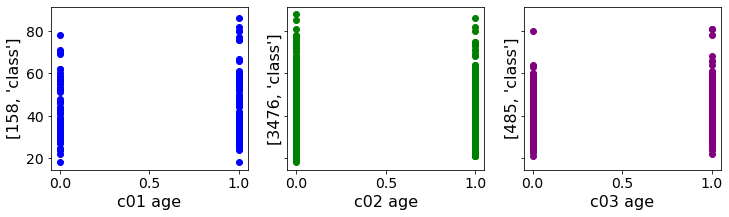

<Figure size 360x360 with 0 Axes>

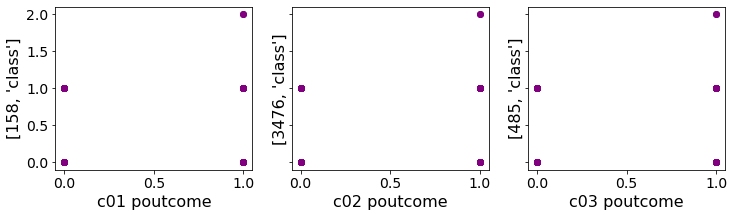

<Figure size 360x360 with 0 Axes>

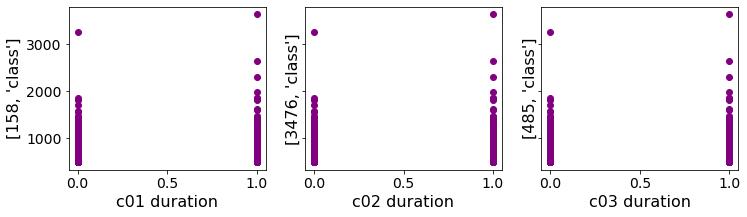

<Figure size 360x360 with 0 Axes>

In [85]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (12, 3))
plt.figure(figsize=(5, 5))

ax1.set_xlabel('c01 age', fontsize = 16)
ax1.set_ylabel([len(c01),'class'], fontsize = 16)

ax2.set_xlabel('c02 age', fontsize = 16)
ax2.set_ylabel([len(c02),'class'], fontsize = 16)

ax3.set_xlabel('c03 age', fontsize = 16)
ax3.set_ylabel([len(c03),'class'], fontsize = 16)

fig, (ax4,ax5,ax6) = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (12, 3))
plt.figure(figsize=(5, 5))
ax4.set_xlabel('c01 poutcome', fontsize = 16)
ax4.set_ylabel([len(c01),'class'], fontsize = 16)

ax5.set_xlabel('c02 poutcome', fontsize = 16)
ax5.set_ylabel([len(c02),'class'], fontsize = 16)

ax6.set_xlabel('c03 poutcome', fontsize = 16)
ax6.set_ylabel([len(c03),'class'], fontsize = 16)

fig, (ax7,ax8,ax9) = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (12, 3))
plt.figure(figsize=(5, 5))

ax7.set_xlabel('c01 duration', fontsize = 16)
ax7.set_ylabel([len(c01),'class'], fontsize = 16)

ax8.set_xlabel('c02 duration', fontsize = 16)
ax8.set_ylabel([len(c02),'class'], fontsize = 16)

ax9.set_xlabel('c03 duration', fontsize = 16)
ax9.set_ylabel([len(c03),'class'], fontsize = 16)


ax1.scatter(c01_[:, 20], c01_[:, 0], marker='o',c='blue')
ax2.scatter(c02_[:, 20], c02_[:, 0], marker='o',c='green')
ax3.scatter(c03_[:, 20], c03_[:, 0], marker='o',c='purple')

ax4.scatter(c03_[:, 20], c03_[:, 14], marker='o',c='purple')
ax5.scatter(c03_[:, 20], c03_[:, 14], marker='o',c='purple')
ax6.scatter(c03_[:, 20], c03_[:, 14], marker='o',c='purple')


ax7.scatter(c03_[:, 20], c03_[:, 10], marker='o',c='purple')
ax8.scatter(c03_[:, 20], c03_[:, 10], marker='o',c='purple')
ax9.scatter(c03_[:, 20], c03_[:, 10], marker='o',c='purple')

     c01   c02  c03
yes   60  3313  295
no    98   163  190


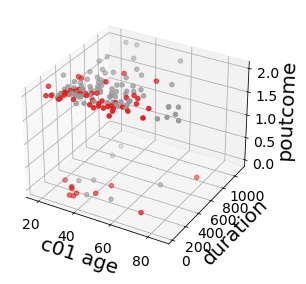

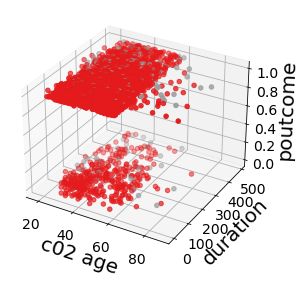

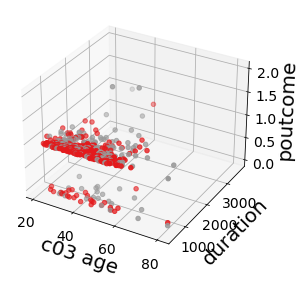

In [161]:
print(df)

#new_dy = est.predict(cdata)
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(122, projection='3d')

ax.set_xlabel('c01 age', fontsize = 20)
ax.set_ylabel('duration', fontsize = 20)
ax.set_zlabel('poutcome', fontsize = 20)

ax.scatter(c01_.T[0], c01_.T[10], c01_.T[14], c=c01_.T[20], cmap=plt.cm.Set1)


plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(122, projection='3d')

ax.set_xlabel('c02 age', fontsize = 20)
ax.set_ylabel('duration', fontsize = 20)
ax.set_zlabel('poutcome', fontsize = 20)

ax.scatter(c02_.T[0], c02_.T[10], c02_.T[14], c=c02_.T[20], cmap=plt.cm.Set1)


plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(122, projection='3d')

ax.set_xlabel('c03 age', fontsize = 20)
ax.set_ylabel('duration', fontsize = 20)
ax.set_zlabel('poutcome', fontsize = 20)

ax.scatter(c03_.T[0], c03_.T[10], c03_.T[14], c=c03_.T[20], cmap=plt.cm.Set1)


plt.show()

In [37]:
#job 多數為藍領階級
#marital 婚姻狀況  不管哪群都是結婚為最多數，再來是單身(single)>>離婚(divorced)>>不清楚(unknow)
#education 教育程度三群都是 大學學歷居多
#default 違約信用為0
#housing 比率差不多  yes 2175 與no 1842
#loan 個人房貸 no佔 2/3
#contact 聯繫方式 cellular較多
#month 最後接觸月
#day_of_week 
#poutcome nonexistent佔多數  成功142  失敗454 #poutcome  1=nonexistent  0=failure 2=sucess

#age 平均在40歲上下
#duration 接觸時間為 第二群相花費時間相對集中，約莫為180秒
#cons.price.idx 消費指數三群平均都非常相近
#euribor3m 歐元利率為23群平均相近 ，第1群較少
#nr.employed 員工數都在5000人以上


In [38]:
#value columns
#age	duration	campaign	pdays	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed previous

#class columns
#job	marital	education	default	housing	loan	contact	month	day_of_week 	poutcome

#透過xgboost找出特徵欄位，最後以f10[duration]與f0[age]為重要特徵
#kmean找出最佳群數為3群，因此將資料分為三群
#以特徵欄位之結果，分析兩欄位透過kmean分群後的比較
#發現Cluster1(n=3476):多數用戶都被歸類在第二群，但第二群與第三群的結果較為相似

#但第二群較第三群，資料相對集中

# sse

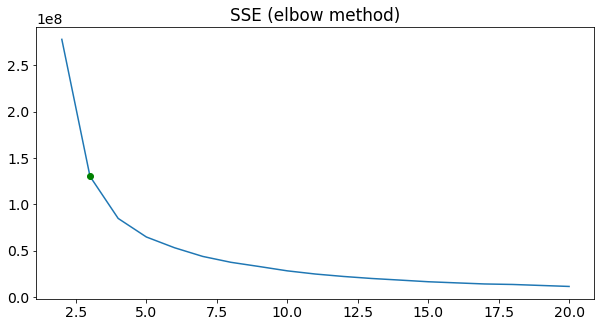

In [39]:
# 繪製誤差平方和圖 
#plt.subplot(223)
plt.figure(figsize=(10, 5))
plt.title('SSE (elbow method)')
plt.plot(k_range, distortions)
plt.plot(selected_K, distortions[selected_K - 2], 'go') # 最佳解

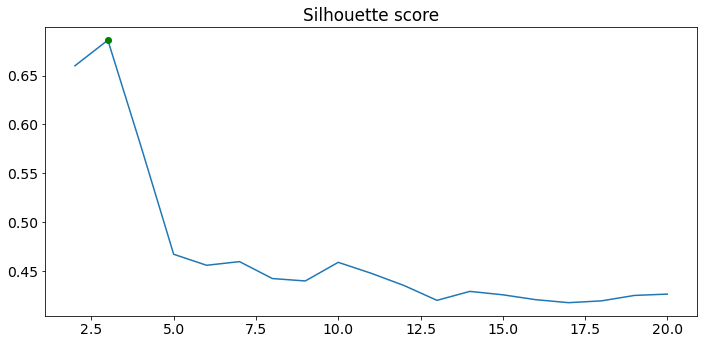

In [40]:
# 繪製係數圖
#plt.subplot(224)
plt.figure(figsize=(10, 5))

plt.title('Silhouette score')
plt.plot(k_range, scores)
plt.plot(selected_K, scores[selected_K - 2], 'go') # 最佳解
plt.tight_layout()
plt.show()